In [2]:
%tensorflow_version 2.x

In [3]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-11-24 08:31:00--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-11-24 08:31:00--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3fbdce1721e6d70cf4cf064d38.dl.dropboxusercontent.com/cd/0/inline/BDwiKOHass4FOn6dBC-zOOthBxIacRxLth5Lfz_ktMcDvLGwKjddA7jp2fG4z8jQuerBL3WGxcJ1Fa5gR5WezoJC-bfgoB3sywxy7dceVOM32g/file# [following]
--2020-11-24 08:31:01--  https://uc3fbdce1721e6d70cf4cf064d38.dl.dropboxusercontent.com/cd/0/inline/BDwiKOHass4FOn6dBC-zOOthBxIacRxLth5Lfz_ktM

In [4]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [5]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

# Import Libraries

In [6]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [7]:
len(os.listdir('test'))

79726

In [8]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [9]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
#Test directory
%mkdir Test

In [14]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [15]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'
    
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [16]:
type(test_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [17]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

# Fit

In [18]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 119s 213ms/step - loss: 3.8321 - accuracy: 0.1189 - val_loss: 3.4887 - val_accuracy: 0.2085
Epoch 2/10
560/560 [==============================] - 118s 211ms/step - loss: 2.9080 - accuracy: 0.2727 - val_loss: 1.9222 - val_accuracy: 0.2864
Epoch 3/10
560/560 [==============================] - 118s 210ms/step - loss: 2.1339 - accuracy: 0.2298 - val_loss: 2.1638 - val_accuracy: 0.2058
Epoch 4/10
560/560 [==============================] - 118s 211ms/step - loss: 1.9734 - accuracy: 0.2760 - val_loss: 2.1428 - val_accuracy: 0.1308
Epoch 5/10
560/560 [==============================] - 118s 210ms/step - loss: 1.8342 - accuracy: 0.3327 - val_loss: 1.5790 - val_accuracy: 0.4371
Epoch 6/10
560/560 [==============================] - 119s 212ms/step - loss: 1.7113 - accuracy: 0.4286 - val_loss: 1.7706 - val_accuracy: 0.4998
Epoch 7/10
560/560 [==============================] - 117s 208ms/step - loss: 1.7037 - accuracy: 0.4312 - val_loss: 1.4399 -

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [20]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [21]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Validate

In [22]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [23]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 117s 208ms/step - loss: 1.8949 - accuracy: 0.3651 - val_loss: 1.2875 - val_accuracy: 0.5277
Epoch 2/5
560/560 [==============================] - 116s 206ms/step - loss: 1.1001 - accuracy: 0.6044 - val_loss: 0.6400 - val_accuracy: 0.7920
Epoch 3/5
560/560 [==============================] - 116s 206ms/step - loss: 0.8221 - accuracy: 0.7138 - val_loss: 0.5151 - val_accuracy: 0.8435
Epoch 4/5
560/560 [==============================] - 115s 205ms/step - loss: 0.6308 - accuracy: 0.7793 - val_loss: 0.4001 - val_accuracy: 0.8618
Epoch 5/5
560/560 [==============================] - 115s 205ms/step - loss: 0.5369 - accuracy: 0.8191 - val_loss: 0.2617 - val_accuracy: 0.9246


In [24]:
%matplotlib inline  
import matplotlib.pyplot as plt

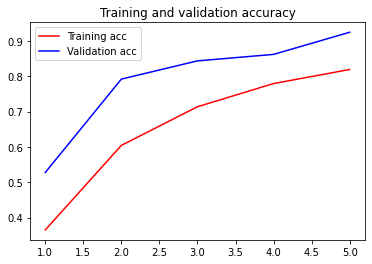

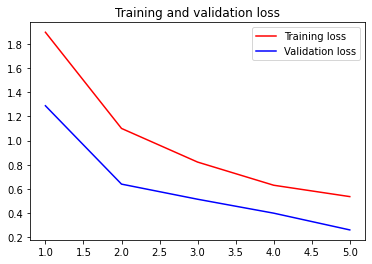

In [25]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
39863/39863 [==============================] - 382s 10ms/step


In [27]:
pred

array([[6.34837997e-05, 1.45714421e-06, 4.51052802e-05, ...,
        2.02468300e-06, 2.14496438e-04, 2.78039843e-05],
       [5.36795199e-07, 7.80065420e-07, 5.10037353e-06, ...,
        6.41006545e-06, 1.54255940e-05, 1.03526891e-05],
       [6.07754230e-01, 2.27952614e-01, 8.05182557e-04, ...,
        1.88582018e-03, 7.89705757e-03, 1.05813548e-01],
       ...,
       [5.78338392e-02, 1.14555825e-02, 9.33361053e-02, ...,
        2.06885617e-02, 1.28750786e-01, 1.50102064e-01],
       [4.01738134e-06, 1.18818036e-06, 4.97585088e-01, ...,
        1.18365875e-04, 2.35090312e-02, 9.27451424e-07],
       [4.55277859e-06, 1.56587832e-09, 8.36082226e-09, ...,
        5.20509191e-10, 1.67669577e-06, 1.32909463e-05]], dtype=float32)

In [28]:
len(pred)

79726

In [29]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,6.348380e-05,1.457144e-06,4.510528e-05,8.242018e-05,4.417850e-06,9.995571e-01,1.765791e-06,2.024683e-06,0.000214,2.780398e-05
1,5.367952e-07,7.800654e-07,5.100374e-06,1.927991e-06,1.410350e-06,9.999577e-01,3.475442e-07,6.410065e-06,0.000015,1.035269e-05
2,6.077542e-01,2.279526e-01,8.051826e-04,3.869909e-02,8.768314e-03,2.041807e-05,4.037005e-04,1.885820e-03,0.007897,1.058135e-01
3,1.437451e-01,1.046645e-01,5.048770e-03,6.937907e-03,4.078547e-01,6.373608e-02,2.036832e-01,8.171368e-04,0.015723,4.778994e-02
4,1.670856e-03,1.030898e-07,4.300227e-07,9.947494e-01,1.954728e-03,1.796016e-04,1.587009e-07,5.483647e-08,0.001263,1.813140e-04
...,...,...,...,...,...,...,...,...,...,...
79721,1.698393e-03,9.529358e-01,1.856523e-02,5.193596e-05,7.871416e-05,2.389155e-04,1.081797e-02,4.386645e-03,0.008622,2.604590e-03
79722,1.415692e-01,4.830128e-01,2.902209e-03,2.627699e-01,8.646058e-04,1.701229e-04,8.219577e-03,1.448698e-04,0.053277,4.706938e-02
79723,5.783384e-02,1.145558e-02,9.333611e-02,3.799070e-02,3.747759e-01,9.785531e-04,1.240879e-01,2.068856e-02,0.128751,1.501021e-01
79724,4.017381e-06,1.188180e-06,4.975851e-01,1.080462e-07,8.521116e-06,1.518652e-07,4.787726e-01,1.183659e-04,0.023509,9.274514e-07


In [30]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [32]:
from google.colab import files
files.download("
Distracted_Driver_MultiAction_classification.csv")

SyntaxError: ignored